   cgpa   iq  profile_score  placed
0  5.97  106             61       0
1  6.83  113             77       0
2  6.60  110             61       0
3  5.54  113             68       0
4  6.84  102             67       0


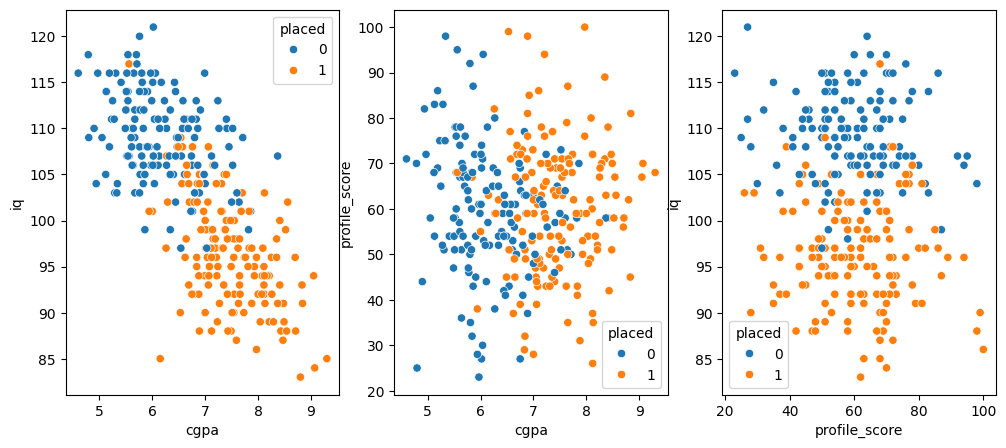

In [ ]:
import pandas as pd

df = pd.read_csv(r"students_placement.csv")
print(df.head())
#trying to host this model


import matplotlib.pyplot as plt
import seaborn as sns
#plt.scatter(df['cgpa'] , df['iq'], c=df['placed'] )
#plt.show()
fig, (ax1,ax2,ax3) = plt.subplots(ncols =3 , figsize=(12,5))
sns.scatterplot(x=df['cgpa'] , y=df['iq'] , hue = df['placed'] , ax=ax1)
sns.scatterplot(x=df['cgpa'] , y=df['profile_score'] , hue = df['placed'] , ax=ax2)
sns.scatterplot(x=df['profile_score'] , y=df['iq'] , hue = df['placed'], ax=ax3)


plt.show()

In [7]:
!pip install ydata-profiling

In [8]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 51.90it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.sample(10)

,cgpa,iq,profile_score,placed
284,7.06,93,44,1
194,7.04,96,47,1
291,7.83,101,41,1
253,8.84,91,81,1
206,5.97,116,23,0
220,7.23,89,58,1
17,8.83,93,45,1
239,6.92,99,85,1
181,6.17,115,52,0
12,6.83,103,29,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scale = MinMaxScaler()
x_train,x_test,y_train,y_test = train_test_split( df[['cgpa', 'iq', 'profile_score']] , df['placed'] , test_size= 0.3 , random_state = 42 )
x_train = scale.fit_transform (x_train)
x_test = scale.transform (x_test)

x_train = pd.DataFrame( (x_train) , columns=['cgpa', 'iq', 'profile_score'] )
x_test = pd.DataFrame( x_test , columns = ['cgpa', 'iq', 'profile_score'])

In [18]:
x_train.sample(20)

,cgpa,iq,profile_score
54,0.563758,0.131579,0.333333
49,0.447427,0.710526,0.506667
179,0.259508,0.973684,0.546667
84,0.275168,0.710526,0.600000
93,0.299776,0.657895,0.066667
107,0.516779,0.763158,0.293333
76,0.550336,0.263158,0.280000
70,0.411633,0.500000,0.413333
198,0.246085,0.921053,0.560000
151,0.722595,0.368421,0.266667


Training Accuracy: 1.0
Test Accuracy: 0.8222222222222222


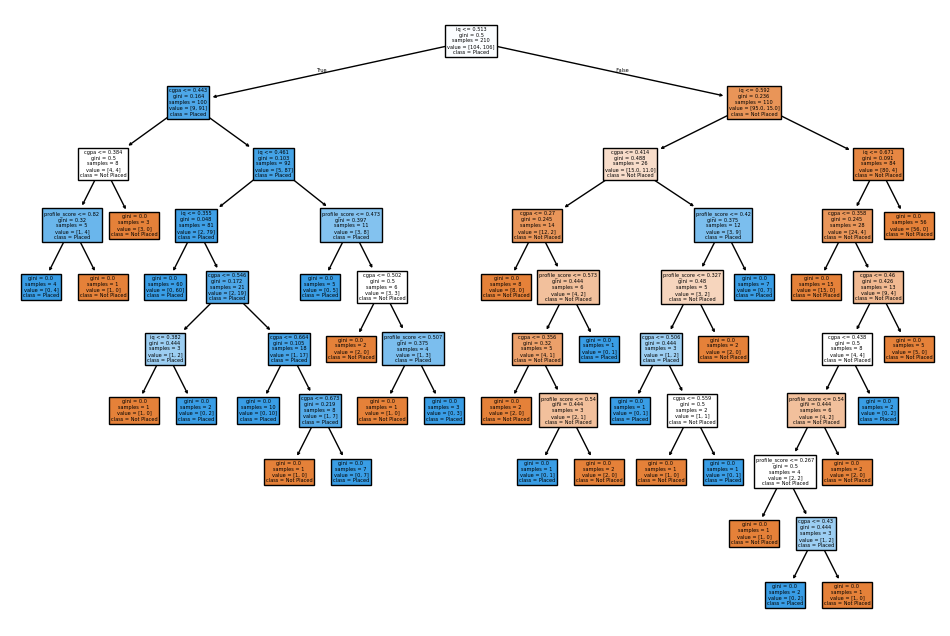

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)

# 2 sets of predictions
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Looking at the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt,
          feature_names=['cgpa', 'iq', 'profile_score'],
          class_names=['Not Placed', 'Placed'],
          filled=True)
plt.show()